In [2]:
import pyproj
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
import math
import matplotlib.image as mpimg

In [3]:

def initialize_cam():
  cam = {
      'x': 26.5220015504,
      'y': 24.214197471,
      'width': 4032,
      'height': 3024,
      'altitude': 1.9911950202659,
      'yaw': 1.5149143672449,
      'pitch': -0.30158202409702,
      'roll': 0.27474563334027,
      'cca': 21.173396500177 #74 
  }
  return cam

# Initialize camera
cam = initialize_cam()

print(cam)

{'x': 26.5220015504, 'y': 24.214197471, 'width': 4032, 'height': 3024, 'altitude': 1.9911950202659, 'yaw': 1.5149143672449, 'pitch': -0.30158202409702, 'roll': 0.27474563334027, 'cca': 21.173396500177}


fov = 102.16944350651386
[[11.709254 11.713597 11.717943 ...       inf       inf       inf]
 [11.707745 11.712085 11.716431 ...       inf       inf       inf]
 [11.706236 11.710575 11.714919 ...       inf       inf       inf]
 ...
 [      inf       inf       inf ...       inf       inf       inf]
 [      inf       inf       inf ...       inf       inf       inf]
 [      inf       inf       inf ...       inf       inf       inf]] [[         0          0          0 ... 4294967295 4294967295 4294967295]
 [         0          0          0 ... 4294967295 4294967295 4294967295]
 [         0          0          0 ... 4294967295 4294967295 4294967295]
 ...
 [4294967295 4294967295 4294967295 ... 4294967295 4294967295 4294967295]
 [4294967295 4294967295 4294967295 ... 4294967295 4294967295 4294967295]
 [4294967295 4294967295 4294967295 ... 4294967295 4294967295 4294967295]]
SizeVector[3024, 4032]
SizeVector[3024, 4032]


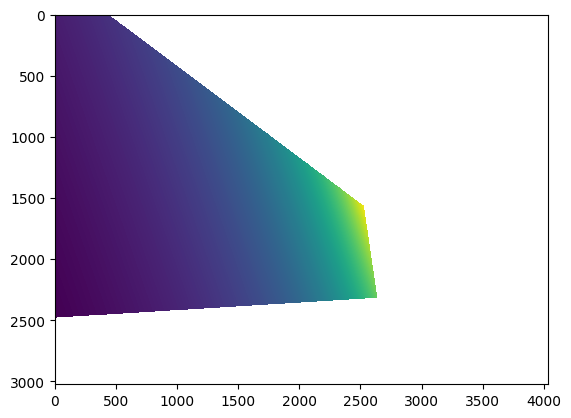

In [14]:
mesh_path = "/path/to/mesh.obj"
image_path = "/path/to/Locallytranslated_images/JPEG.jpg"

def project_image(mesh_path, image_path, cam):
    # Load mesh
    LoD2 = o3d.io.read_triangle_mesh(mesh_path, 
                    enable_post_processing=False, print_progress=True)
    mesh = o3d.t.geometry.TriangleMesh.from_legacy(LoD2)


    # Load image
    image = o3d.io.read_image(image_path)
    min_extents = np.array([3.490436, 6.703003, 0.93])
    max_extents = np.array([27.493946, 67.627477, 19.78])
    Center = (min_extents + max_extents)/1.6 

    # Create RaycastingScene
    scene = o3d.t.geometry.RaycastingScene()
    mesh_id = scene.add_triangles(mesh)

    # Generate rays
    fov = ((np.arctan(((cam['width']/2)/cam['cca']))*2)*180/math.pi)/1.75 #175.81 reviewed 
    rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
        fov_deg=fov,
        center= Center, #[cam['x'], cam['y'], cam['cca']],
        eye=[cam['x'], cam['y'], cam['altitude']],# check the yaw pitch raw 
        up=[0, 0, -360], 
        width_px=cam['width'],
        height_px=cam['height'],
    )
    print(f"fov = {fov}")

    # Perform raycasting
    raycast_results = scene.cast_rays(rays)
    print(raycast_results['t_hit'].numpy(), raycast_results['geometry_ids'].numpy())
    
    print(raycast_results['geometry_ids'].shape) # inspect mon feb19 13:56
    print(raycast_results['t_hit'].shape) #inspect mon feb19 13:56
    
    plt.imshow(raycast_results['t_hit'].numpy())
    
project_image(mesh_path, image_path, cam)


# ideal fov = 175.7


In [ ]:
plt.imshow(np.abs(raycast_result['primitive_normals'].numpy()))

In [ ]:
plt.imshow(raycast_results['geometry_ids'].numpy(), vmax=3)

In [ ]:
# save the created images to a folder
    path = '/path/to/Raycasting/Image' + '.jpeg'

    # Saving images
    mpimg.imsave('/path/to/Raycasted Images/geometry_ids.jpeg',
                 raycast_results['geometry_ids'].numpy(), vmax=3)
    mpimg.imsave('/path/to/primitive_normals.jpeg',
                 np.abs(raycast_results['primitive_normals'].numpy()))

    # Reading saved images
    a = mpimg.imread('/path/to/Raycasted Images/geometry_ids.jpeg')
    b = mpimg.imread('/path/to/Raycasted Images/primitive_normals.jpeg')
    mpimg.imsave(path, a + b)

    path_to_images = r'path/to/Raycasted Images'

In [ ]:
plt.imshow(raycast_results['geometry_ids'].numpy(), vmax=3)